# Business case :- Predecting of receiving tips in a perticular restaurant

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
data=sns.load_dataset('tips')

In [4]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [7]:
data.time.values

['Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner', ..., 'Dinner', 'Dinner', 'Dinner', 'Dinner', 'Dinner']
Length: 244
Categories (2, object): ['Lunch', 'Dinner']

## Basic understanding of features-- Domain Analysis
Total_bill : It is a total bill of a perticular person or a party who were present in a perticular restaurant.

Sex: It is the sex of a customer, maybe male or female who were preset in the restaurant.

Smoker: Through this column we can get to know if the perticular customer is smoker or not.

Day: This column let us know the perticular customer was present on which day in the restaurant, in this dataset we have the        data of 4 days only like Thursday, Friday, Saturday, Sunday.

Time: This column is about timing, like the perticular  customer was present on which time, like Lunch time or Dinner time.

Size: This columns shows us the perticular customer's party or family size, like maybe the customers comes along with 2 persons       or 3

Tip: Tip is an expression of appreciation or gratitude or an acknowledgment of services or favours given. Here tip is in form        of money, this tip column shows us whcih customer is giving how much tip to the restaurant. this tip is our target              variable.

In [8]:
## Basic Checks
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [13]:
data.describe(include='O')

ValueError: No objects to concatenate

In [15]:
data.index

RangeIndex(start=0, stop=244, step=1)

In [25]:
data.tip.value_counts()
## Here we can see maximum 33 times tips was given that is $2.00


2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
2.83     1
1.58     1
3.71     1
3.35     1
2.18     1
Name: tip, Length: 123, dtype: int64

In [26]:
print('maximum tip value is ', data.tip.values.max())
# maximum tip value is $10

maximum tip value is  10.0


In [17]:
data.total_bill.value_counts()
# total bill value counts

13.42    3
10.33    2
20.29    2
18.29    2
17.92    2
        ..
30.40    1
26.59    1
19.65    1
9.55     1
5.75     1
Name: total_bill, Length: 229, dtype: int64

In [27]:
data.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [28]:
data.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

## Exploratory Data Analysis

### Univariate Analysis-- Analyzing single variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


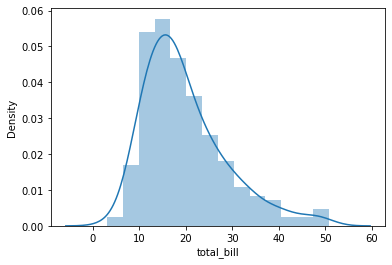

In [29]:
## ANalyszing total_bill

sns.distplot(data.total_bill.dropna(axis=0))
## Normal distribution with slightly positive skewness, so here mean is greater than mode
## The data is concentarted between 10 to 25
plt.show()

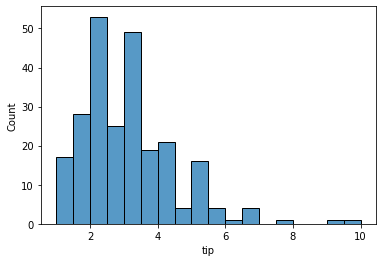

In [30]:
## Analyzing tip
sns.histplot(data.tip.dropna(axis=0))
plt.show()
##it is normally distributed with a little positive skewness means here mean is greater than mode
## maximum values are between 2 to 4
## tips between 7 to 10 is very less, so ery few persons are giving high tips

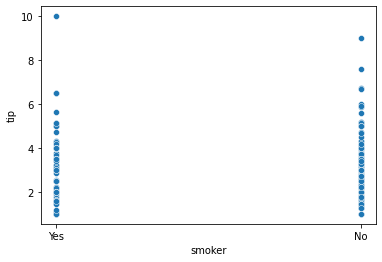

In [31]:
## Analyzing smoker
sns.scatterplot(x=data.smoker,y=data.tip)
plt.show()
## maximum smoker is giving tips between 1-5, higest tip i.e.10 is giving by a smoker
## maximum non-smoker is giving tips between 1-6, 3 non-smoker is giving tips between 6-9 

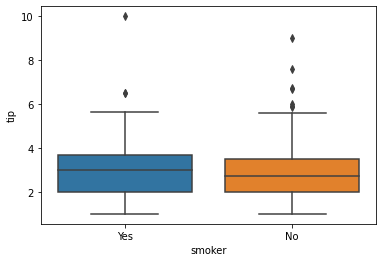

In [32]:
sns.boxplot(x=data.smoker,y=data.tip)
plt.show()
## here we can see there is outlier for the smoker 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


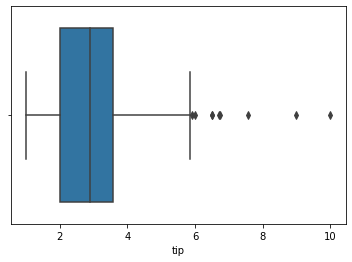

In [56]:
sns.boxplot(data.tip)
plt.show()
# 50% tip is between 2 to 4
# tip contains some outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


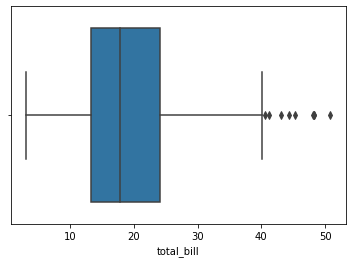

In [57]:
sns.boxplot(data.total_bill)
plt.show()
## total bill contains some outliers
## 50% bill is between 12 to 25

## Bivariate Analysis-->Analyzing 2 variables at a time.

In [40]:
freqs = data.sex.value_counts(normalize = True )
freqs
## 64% is male customers and 35% is female customers

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

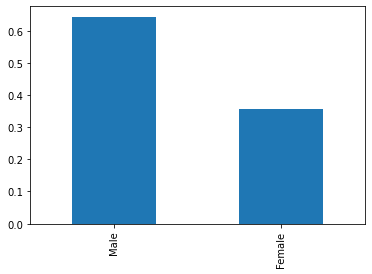

In [38]:
data.sex.value_counts(normalize=True).plot.bar()
plt.show()
## male customers are more than female customers

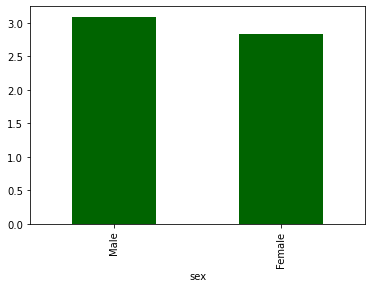

In [42]:
data.groupby(['sex'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()
## the average tip slightly differs by gender. Male tip slightly more than female

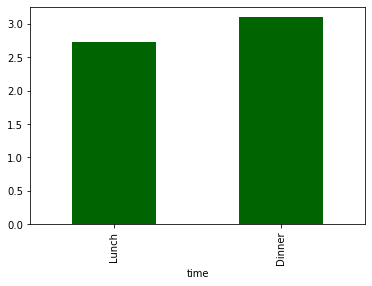

In [44]:
data.groupby(['time'])['tip'].mean().plot.bar(color="darkgreen")
plt.show()
##people give more tip during Dinner compared to Lunch

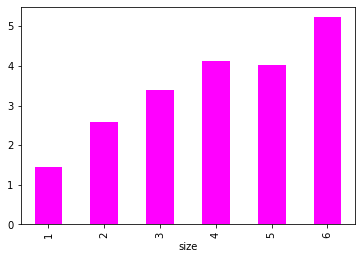

In [48]:
data.groupby(['size'])['tip'].mean().plot.bar(color="magenta")
plt.show()
## more the number of people, higher the tip.

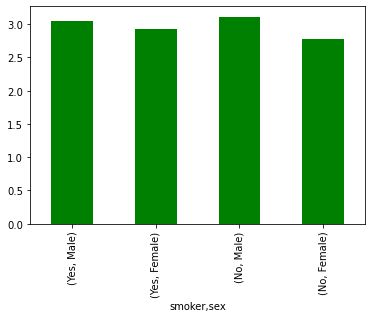

In [49]:
data.groupby(['smoker','sex'])['tip'].mean().plot.bar(color="green")
plt.show()
## there are slight differce between male-smoker, female-smoker and male-nonsmoker and female-nonsmoker,
## male non-smoker has given highest amount of tips

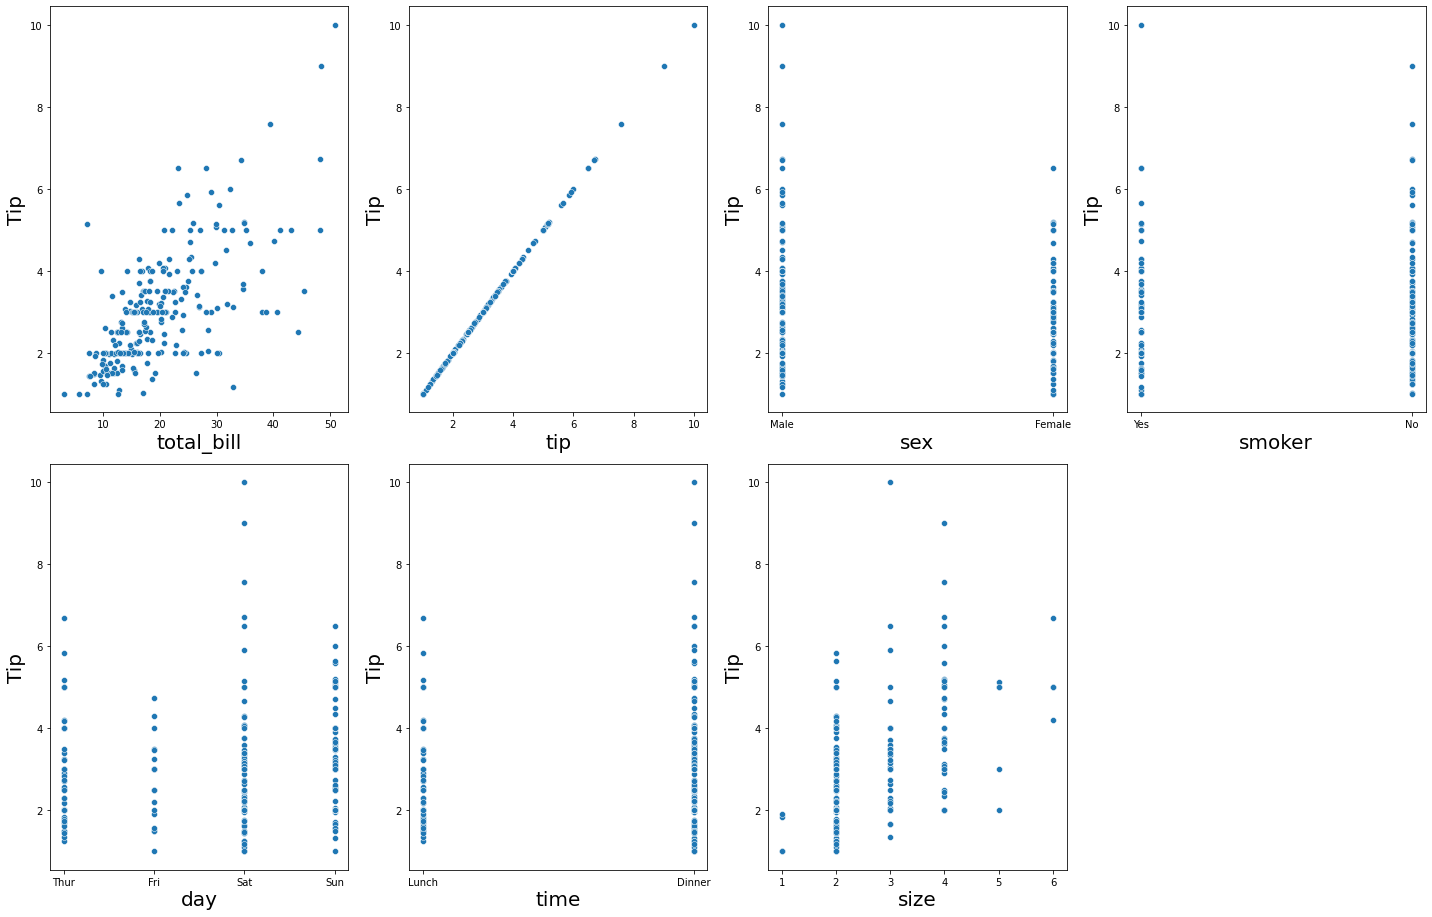

In [50]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=260 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data[column].dropna(axis=0)
                        ,y=data.tip)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Tip',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied.

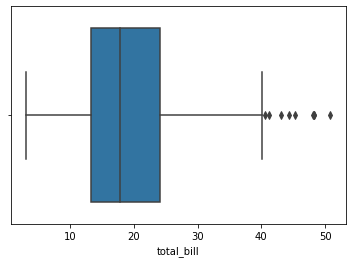

In [51]:
sns.boxplot(x=data.total_bill,hue='tip',data=data)
plt.show()
#there are some outliers in total_bill
# 50% data lies between 12 to 25

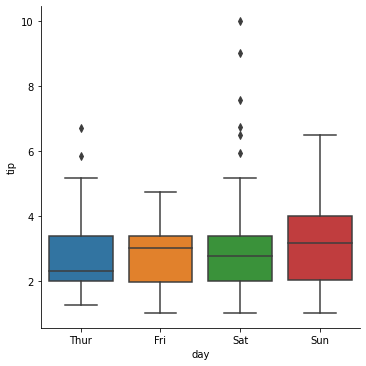

In [53]:
sns.catplot(x="day", y="tip", kind="box", data=data) ## catplot is for categorical data
plt.show()
## here we can see Thursday and Saturday has some outliers with respect to tip

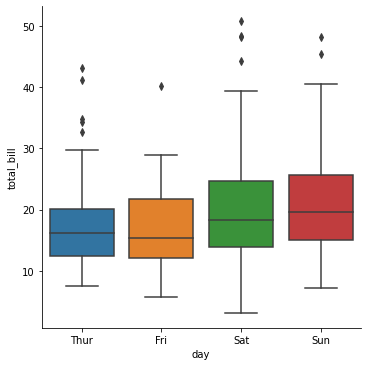

In [55]:
sns.catplot(x="day", y="total_bill", kind="box", data=data)
plt.show()
## There is outliers with rest to total bill in each day

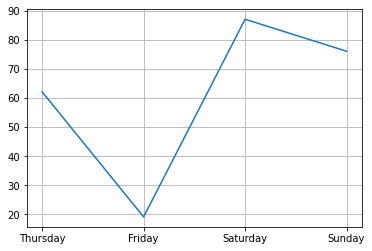

In [58]:
tipsun=data[data['day']=="Sun"]
tipthus=data[data['day']=="Thur"]
tipfri=data[data['day']=="Fri"]
tipsat=data[data['day']=="Sat"]
#count of no of customer
tipsunc=tipsun.tip.count()
tipthusc=tipthus.tip.count()
tipfric=tipfri.tip.count()
tipsatc=tipsat.tip.count()

#pplot of number of customer
plt.plot([tipthusc,tipfric,tipsatc,tipsunc])
plt.xticks([0.0,1.0,2.0,3.0],["Thursday",'Friday',"Saturday","Sunday"])
plt.grid(True)
plt.show()

## maximum tip was given on saturday and count is around 85
## minimum tip was given on Friday and count is around 19

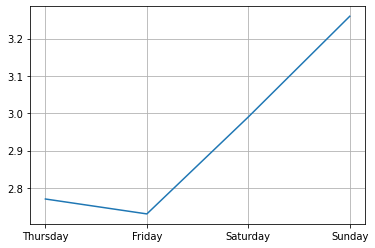

In [59]:
#mean tip per day
avgthustip=round((tipthus['tip']).mean(),2)
avgfritip=round((tipfri['tip']).mean(),2)
avgsattip=round((tipsat['tip']).mean(),2)
avgsuntip=round((tipsun['tip']).mean(),2)


#plot mean tip per day
plt.plot([avgthustip,avgfritip,avgsattip,avgsuntip])
plt.xticks([0.0,1.0,2.0,3.0],["Thursday",'Friday',"Saturday","Sunday"])
plt.grid(True)
plt.show()
## here we can see mean-tip is maximum on Sunday and it is around 3.3
## mean-tip is minimum on Friday

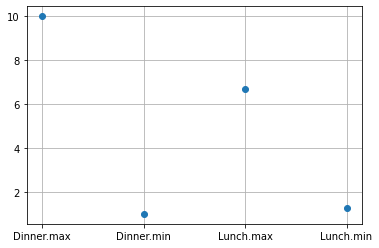

In [60]:
timeD= data[data['time']=="Dinner"]
timeL =data[data['time']=="Lunch"]

#tip in dinner
maxtimeD=timeD.tip.max()
mintimeD=timeD.tip.min()
#tip in lunch
maxtimeL=timeL.tip.max()
mintimeL=timeL.tip.min()

#average tip in dinner
avgtimeD=timeD.tip.mean()
#average tip in lunch
avgtimeL = timeL.tip.mean()

plt.plot([maxtimeD,mintimeD,maxtimeL,mintimeL],"o")
plt.xticks([0.0,1.0,2.0,3.0],["Dinner.max","Dinner.min","Lunch.max","Lunch.min"])
plt.grid(True)
plt.show()

## maximum tip i.e. $10 wan given during dinner time
## 

In [63]:
smokertip=data[data['smoker']=="Yes"]
nonsmokertip=data[data['smoker']=='No']


In [62]:
smokertip.tip.mean()

3.008709677419355

In [64]:
nonsmokertip.tip.mean()

2.9918543046357624

## Bivariate and Multivariate Analysis¶

## Data Preprocessing

In [65]:
## Checking missing values
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [66]:
## As there is no missing values in the dataset so we need not to treat missing values

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [4]:
data.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [68]:
## Here 4 columns i.e. sex,smoker,day,time is category type so we need to convert categorical data to numerical equivalent

In [5]:
#conversion category type data to numerical equivalent
data.sex=data.sex.map({'Male':1,'Female':2})

In [6]:
data.sex

0      2
1      1
2      1
3      1
4      2
      ..
239    1
240    2
241    1
242    1
243    2
Name: sex, Length: 244, dtype: category
Categories (2, int64): [1, 2]

In [7]:
data.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [8]:
data.smoker=data.smoker.map({'No':0,'Yes':1})

In [9]:
data.smoker

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    1
241    1
242    0
243    0
Name: smoker, Length: 244, dtype: category
Categories (2, int64): [1, 0]

In [10]:
data.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [10]:
data.day=data.day.map({'Sat':1,'Sun':2,'Thur':3,'Fri':4})

In [12]:
data.day

0      2
1      2
2      2
3      2
4      2
      ..
239    1
240    1
241    1
242    1
243    3
Name: day, Length: 244, dtype: category
Categories (4, int64): [3, 4, 1, 2]

In [13]:
data.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [11]:
data.time=data.time.map({'Dinner':1,'Lunch':2})
data.time

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    1
241    1
242    1
243    1
Name: time, Length: 244, dtype: category
Categories (2, int64): [2, 1]

In [12]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [16]:
data.sex.describe()

count     244
unique      2
top         1
freq      157
Name: sex, dtype: int64

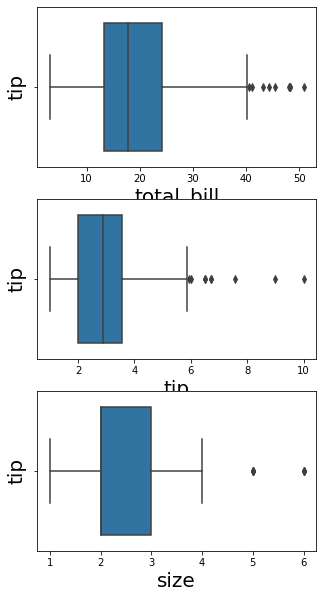

In [13]:
## Lets check outliers in any
box=data[['total_bill', 'tip','size']]
plt.figure(figsize=(5,10), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=260 :     # as there are 9 columns in the data
        ax = plt.subplot(3,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('tip',fontsize=20)
    plotnumber+=1
plt.show()

In [22]:
## There are some outliers

In [14]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

total_bill    10.7800
tip            1.5625
size           1.0000
dtype: float64


In [15]:
##print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

print(data['total_bill'].skew())
data['total_bill'].describe()

1.1332130376158205


count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [27]:
print(data['tip'].skew())
data['tip'].describe()

1.4654510370979401


count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [28]:
print(data['size'].skew())
data['size'].describe()

1.4478815386834785


count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

In [29]:
##print(data['smoker'].skew())
##data['smoker'].describe() ## in categorical data can't perform skew

TypeError: Categorical cannot perform the operation skew

In [16]:
data['smoker'].astype('object')

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    1
241    1
242    0
243    0
Name: smoker, Length: 244, dtype: object

In [18]:
data["smoker"] = data['smoker'].astype('object')
data["sex"] = data['sex'].astype('object')
data["day"] = data['day'].astype('object')
data["time"] = data['time'].astype('object')
data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

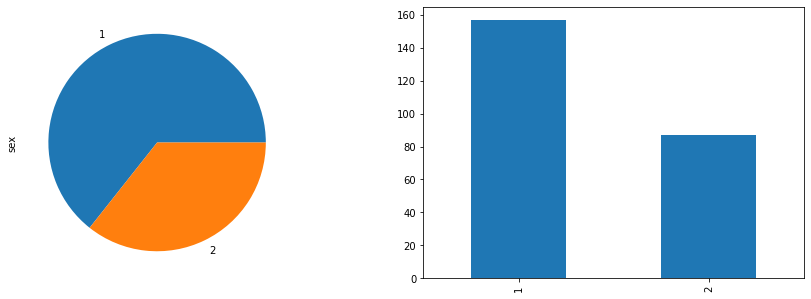

In [19]:
fig, axes=plt.subplots(1,2,figsize=(15,5))
data['sex'].value_counts().plot(kind='bar',ax=axes[1])
data['sex'].value_counts().plot(kind='pie',ax=axes[0])
plt.show()

In [14]:
data['zscore']=(data['total_bill']-data['total_bill'].mean())/data['total_bill'].std()

In [15]:
data2=data[(data['zscore']>3) | (data['zscore']<-3) ]
data2

,total_bill,tip,sex,smoker,day,time,size,zscore
59,48.27,6.73,Male,No,Sat,Dinner,4,3.199589
156,48.17,5.00,Male,No,Sun,Dinner,6,3.188356
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.484905
212,48.33,9.00,Male,No,Sat,Dinner,4,3.206329


In [16]:
data3=data[(data['zscore']<3) & (data['zscore']>-3)]
data3

,total_bill,tip,sex,smoker,day,time,size,zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314066
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.061054
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137497
3,23.68,3.31,Male,No,Sun,Dinner,2,0.437416
4,24.59,3.61,Female,No,Sun,Dinner,4,0.539635
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1.038377
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.830568
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.323964
242,17.82,1.75,Male,No,Sat,Dinner,2,-0.220833


In [20]:
## Skweness and Kurtosis test i.e check for normality
from scipy import stats
for column in box:
    print(stats.skew(box[column]),column)
    ## it shows all data are highly skewed

1.1262346334818638 total_bill
1.4564266884221506 tip
1.4389653841920984 size


In [21]:
for column in box:
    print(stats.kurtosis(box[column]),column)
##total_bill and size have thick bell curve
## tip has thin bell curve

1.1691681323851366 total_bill
3.5495519893455114 tip
1.6719276263625504 size


In [21]:
## Scaling the data.As we will implement linear regression so we need to make all numerical features into same sacle.
## From the EDA stage we have found all numericla variables are normally distributed so we can apply 
## Standard scaler.

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
data[['total_bill', 'tip','size','sex','smoker','day','time']]= sc.fit_transform(data[['total_bill', 'tip','size','sex','smoker','day','time']])

In [25]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,1.343353,-0.784789,-0.055568,-0.621582,-0.600193
1,-1.063235,-0.969205,-0.744406,-0.784789,-0.055568,-0.621582,0.453383
2,0.137780,0.363356,-0.744406,-0.784789,-0.055568,-0.621582,0.453383
3,0.438315,0.225754,-0.744406,-0.784789,-0.055568,-0.621582,-0.600193
4,0.540745,0.443020,1.343353,-0.784789,-0.055568,-0.621582,1.506958


## Feature Selection

In [24]:
## Feature selection is done to get that specific features which are important to predict the 
## the target varaible.

## First remove the redundant colunms i.e serial no,customer id,ids
## In second step remove constant columns,the columns not providing information.
## i.e standard deviation=0

In [29]:
##checking the constant feature
data.describe()
##there is no constant feature in the given dataset

,total_bill,tip,sex,smoker,day,time,size
count,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02
mean,9.100189e-19,-5.005459e-17,2.275047e-17,1.456030e-16,-9.964707e-17,-2.939361e-16,-1.037422e-16
std,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00
min,-1.881547e+00,-1.447189e+00,-7.444059e-01,-7.847892e-01,-1.098541e+00,-6.215816e-01,-1.653768e+00
25%,-7.247111e-01,-7.229713e-01,-7.444059e-01,-7.847892e-01,-1.098541e+00,-6.215816e-01,-6.001926e-01
50%,-2.241005e-01,-7.117518e-02,-7.444059e-01,-7.847892e-01,-5.556824e-02,-6.215816e-01,-6.001926e-01
75%,4.886857e-01,4.086192e-01,1.343353e+00,1.274228e+00,9.874049e-01,1.608799e+00,4.533829e-01
max,3.492068e+00,5.070772e+00,1.343353e+00,1.274228e+00,2.030378e+00,1.608799e+00,3.614110e+00


In [27]:
data.smoker.describe()

count    2.440000e+02
mean     1.456030e-16
std      1.002056e+00
min     -7.847892e-01
25%     -7.847892e-01
50%     -7.847892e-01
75%      1.274228e+00
max      1.274228e+00
Name: smoker, dtype: float64

In [26]:
data.describe()
##there is no constant feature in the given dataset

,total_bill,tip,sex,smoker,day,time,size
count,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02,2.440000e+02
mean,9.100189e-19,-5.005459e-17,2.275047e-17,1.456030e-16,-9.964707e-17,-2.939361e-16,-1.037422e-16
std,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00,1.002056e+00
min,-1.881547e+00,-1.447189e+00,-7.444059e-01,-7.847892e-01,-1.098541e+00,-6.215816e-01,-1.653768e+00
25%,-7.247111e-01,-7.229713e-01,-7.444059e-01,-7.847892e-01,-1.098541e+00,-6.215816e-01,-6.001926e-01
50%,-2.241005e-01,-7.117518e-02,-7.444059e-01,-7.847892e-01,-5.556824e-02,-6.215816e-01,-6.001926e-01
75%,4.886857e-01,4.086192e-01,1.343353e+00,1.274228e+00,9.874049e-01,1.608799e+00,4.533829e-01
max,3.492068e+00,5.070772e+00,1.343353e+00,1.274228e+00,2.030378e+00,1.608799e+00,3.614110e+00


<AxesSubplot:>

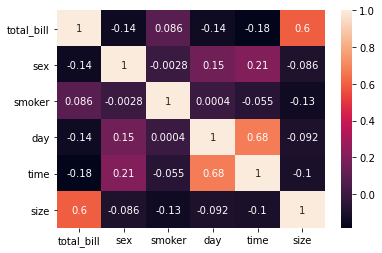

In [31]:
## Third step is Checking correlation i.e checking the linear relation between 2 variables.
sns.heatmap(data.drop('tip',axis=1).corr(),annot=True)

In [33]:
## ## There seems to be relationship between total_bill and size, sex,smoker, day, time however the relationship is not that strong.So we will not drop 
## further any features

## Model Building

In [32]:
data.tip

0     -1.439947
1     -0.969205
2      0.363356
3      0.225754
4      0.443020
         ...   
239    2.115963
240   -0.722971
241   -0.722971
242   -0.904026
243    0.001247
Name: tip, Length: 244, dtype: float64

In [53]:
## Definig independent and dependent variable
data_1=data.copy()
data_1.pop('tip')
X=data_1
y=data.tip

In [55]:
X

,total_bill,sex,smoker,day,time,size
0,-0.314711,1.343353,-0.784789,-0.055568,-0.621582,-0.600193
1,-1.063235,-0.744406,-0.784789,-0.055568,-0.621582,0.453383
2,0.137780,-0.744406,-0.784789,-0.055568,-0.621582,0.453383
3,0.438315,-0.744406,-0.784789,-0.055568,-0.621582,-0.600193
4,0.540745,1.343353,-0.784789,-0.055568,-0.621582,1.506958
...,...,...,...,...,...,...
239,1.040511,-0.744406,-0.784789,-1.098541,-0.621582,0.453383
240,0.832275,1.343353,1.274228,-1.098541,-0.621582,-0.600193
241,0.324630,-0.744406,1.274228,-1.098541,-0.621582,-0.600193
242,-0.221287,-0.744406,-0.784789,-1.098541,-0.621582,-0.600193


In [56]:
y

0     -1.439947
1     -0.969205
2      0.363356
3      0.225754
4      0.443020
         ...   
239    2.115963
240   -0.722971
241   -0.722971
242   -0.904026
243    0.001247
Name: tip, Length: 244, dtype: float64

In [63]:
## Definiging training and testing data, on training data, model will be created.Now to evaluate the 
## model,testing data is required.However on production you will have unseen data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [64]:
## Model creation
from sklearn.linear_model import LinearRegression ## importing the model library 

LR=LinearRegression() ## creating the model object 
LR.fit(X_train,y_train) ## fitting the training data.
y_hat=LR.predict(X_test) ## prediciton from model

In [65]:
y_hat

array([-0.04925589, -0.74246998,  0.68191901,  0.57214529, -0.61029856,
       -0.26152463,  0.46831982, -0.50484852, -0.33267506, -0.33803277,
       -0.09334392, -0.66633475, -0.62962801, -0.49403722, -0.84338642,
        0.08938504, -0.02091438,  0.13098641, -0.30487515,  2.00122403,
        0.33265304,  0.1815489 , -0.59169865, -0.74952108,  0.09209048,
       -0.53288098, -0.64019172,  0.1562964 ,  0.13234379,  2.64088239,
        1.42957629, -1.01384335,  0.16211287, -0.1581152 , -0.03497208,
        0.63452503, -0.54062013,  1.79118879, -0.45848238,  0.00416632,
       -0.68406299, -0.36575008,  0.29258607, -0.48772387, -0.76583792,
       -1.5323146 , -0.84534875,  0.0479053 , -0.81448714])

In [66]:
## Model Evaluation
##prediciton on training data
y_train_predict=LR.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

0.45764639996030987

In [67]:
test_score=r2_score(y_test,y_hat)
test_score

0.4383650491792537

In [69]:
X_train.shape,X_test.shape

((195, 6), (49, 6))

In [70]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.45)*(195-1)/(195-6-1)
train_adjusted_r2

0.4324468085106383

In [71]:
test_adjusted_r2= 1-(1-0.43)*(49-1)/(49-6-1)
test_adjusted_r2

0.34857142857142853

In [72]:
print('intercept:', LR.intercept_) ## c value

intercept: 0.034328184013308165


In [73]:
print('slope:', LR.coef_) ## m0,m1,m2,m3,m4,m5,m6

slope: [ 0.60577034 -0.01237408 -0.06843388  0.05775393 -0.02230493  0.16535199]
